# Imputation

In [1]:
library(rethinking)
data(milk)

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders




rstan version 2.26.20 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: C:/Users/immal/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)


Attache Paket: 'rethinking'


Das folgende Objekt ist maskie

How does the neocortex percentage influence the milk energy content per clade.

In [17]:
# We construct our data
d <- data.frame(list(energy = milk$kcal.per.g))
d$energy <- scale(d$energy)
d$neo <- milk$neocortex.perc
d$clade <- milk$clade
d$clade <- as.integer(d$clade)
d

energy,neo,clade
"<dbl[,1]>",<dbl>,<int>
-0.9400408,55.16,4
-0.8161263,NA,4
-1.1259125,NA,4
-1.0019980,NA,4
-0.2585112,NA,4
-1.0639553,64.54,2
-0.5063402,64.54,2
1.5382486,67.64,2
1.6621631,NA,2


In [18]:
# Linear model with imputation
linear <- map2stan(
    alist(
        energy ~ dnorm(mu, sigma),
        mu <- a[clade] + b_neo[clade] * neo,
        neo ~ dnorm(nu, 10),
        nu ~ dnorm(0, 10),
        a[clade] ~ dnorm(0, 10),
        b_neo[clade] ~ dnorm(0, 10),
        sigma ~ dcauchy(0, 10)
    ),
    data = d,
    constraints = list(sigma = "lower=0"),
    cores = 7, chains = 7
)

Warning message in map2stan(alist(energy ~ dnorm(mu, sigma), mu <- a[clade] + b_neo[clade] * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(energy ~ dnorm(mu, sigma), mu <- a[clade] + b_neo[clade] * :
"Stripping scale attributes from variable energy"
Imputing 12 missing values (NA) in variable 'neo'.



Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpCaZut5/model-69867081af4.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpCaZut5/model-69867081af4.stan', line 8, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpCaZut5/model-69867081af4.stan', line 9, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 7 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 6 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 7 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  400 / 200

Computing WAIC



In [19]:
post <- extract.samples(linear)

In [20]:
precis(linear, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
neo_impute[1],63.3892181571,9.33394522,48.70899450,78.45522450,6614.872621,1.0003607
neo_impute[2],63.4009287429,9.38078732,48.71799500,78.67385750,6097.436020,1.0001370
neo_impute[3],63.4269424000,9.28909305,48.87658600,78.56366050,6679.755308,0.9996422
neo_impute[4],63.5574966857,9.54524143,48.51542150,78.91384550,5855.133701,0.9999057
neo_impute[5],69.2658632857,8.94658960,53.79385150,82.44912000,3620.349235,1.0009240
neo_impute[6],64.3586789429,7.62794389,52.22287350,76.45337500,6294.682747,1.0007344
neo_impute[7],64.7201195429,8.91139318,50.14403300,78.96840000,6063.130799,0.9998347
neo_impute[8],64.5950334286,9.25112534,49.62103500,79.06850900,6160.991730,1.0000465
neo_impute[9],65.1246132857,9.06170300,50.32885150,79.26657750,5878.960267,1.0007952


In [21]:
imput <- d[!complete.cases(d), ]
imput$neo <- apply(post$neo_impute, 2, mean)
imput

,energy,neo,clade
,"<dbl[,1]>",<dbl>,<int>
2,-0.8161263,63.38922,4
3,-1.1259125,63.40093,4
4,-1.0019980,63.42694,4
5,-0.2585112,63.55750,4
9,1.6621631,69.26586,2
14,0.4230184,64.35868,2
15,0.5469328,64.72012,3
17,0.4849756,64.59503,3
19,0.9186762,65.12461,3


[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


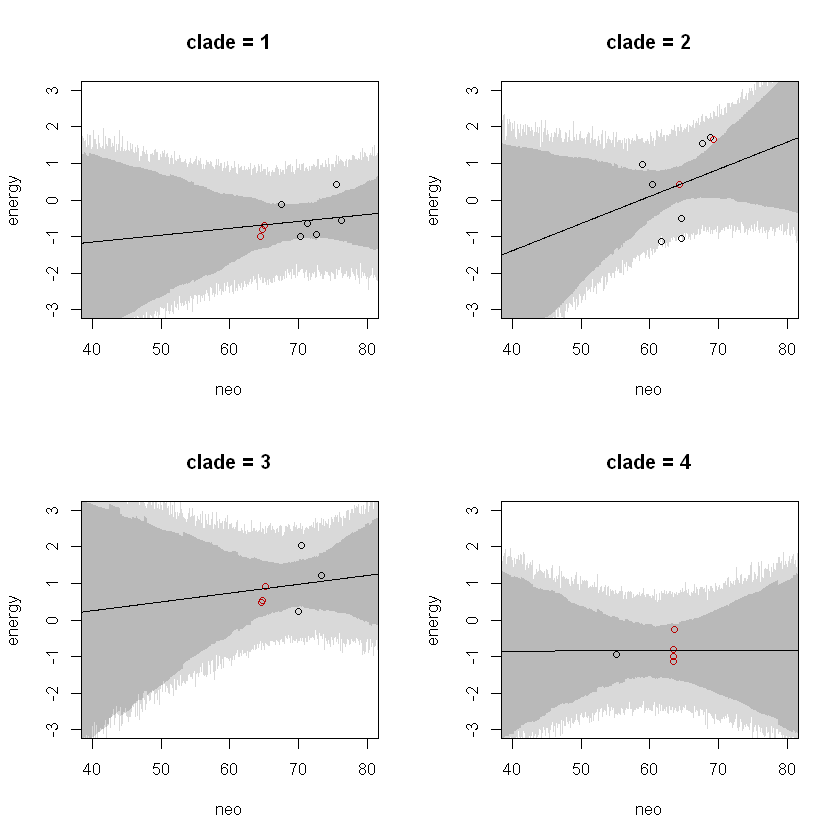

In [23]:
model <- linear
post <- extract.samples(model)
seq <- seq(from = 0, to = 100, by = 0.1)

# make a plot window with three panels in a single row 
par(mfrow=c(2,2)) # 1 row, 4 columns

for (clade in 1:4) {
plot(energy ~ neo, data = d[d$clade == clade, ], xlim = c(40, 80), ylim = c(-3, 3))
points(imput$neo[imput$clade == clade], imput$energy[imput$clade == clade], col = "red")
title(paste("clade =", clade))

mu_link <- function(neo) post$a[, clade] + post$b_neo[, clade] * neo

mu <- sapply(seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)
lines(seq, mu_mean)
shade(mu_HPDI, seq)

sim_data <- sim(linear, data = list(neo = seq, clade = clade))
sim_HPDI <- apply(sim_data, 2, HPDI, prob = 0.91)
shade(sim_HPDI, seq)
}

In [24]:
# Linear model with imputation and partial pooling
linear_pool <- map2stan(
    alist(
        energy ~ dnorm(mu, sigma),
        mu <- a[clade] + b_neo[clade] * neo,
        neo ~ dnorm(nu, 10),
        nu ~ dnorm(0, 10),
        a[clade] ~ dnorm(a_pool, 10),
        a_pool ~ dnorm(0, 10),
        b_neo[clade] ~ dnorm(b_neo_pool, 10),
        b_neo_pool ~ dnorm(3, 1),
        sigma ~ dcauchy(0, 10)
    ),
    data = d,
    constraints = list(sigma = "lower=0"),
    cores = 7, chains = 7
)

Warning message in map2stan(alist(energy ~ dnorm(mu, sigma), mu <- a[clade] + b_neo[clade] * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(energy ~ dnorm(mu, sigma), mu <- a[clade] + b_neo[clade] * :
"Stripping scale attributes from variable energy"
Imputing 12 missing values (NA) in variable 'neo'.



Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpCaZut5/model-698405617b4.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpCaZut5/model-698405617b4.stan', line 8, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpCaZut5/model-698405617b4.stan', line 9, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 6 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 7 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 6 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 7 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  200 / 200

Computing WAIC



In [26]:
post_linear_pool <- extract.samples(model)

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


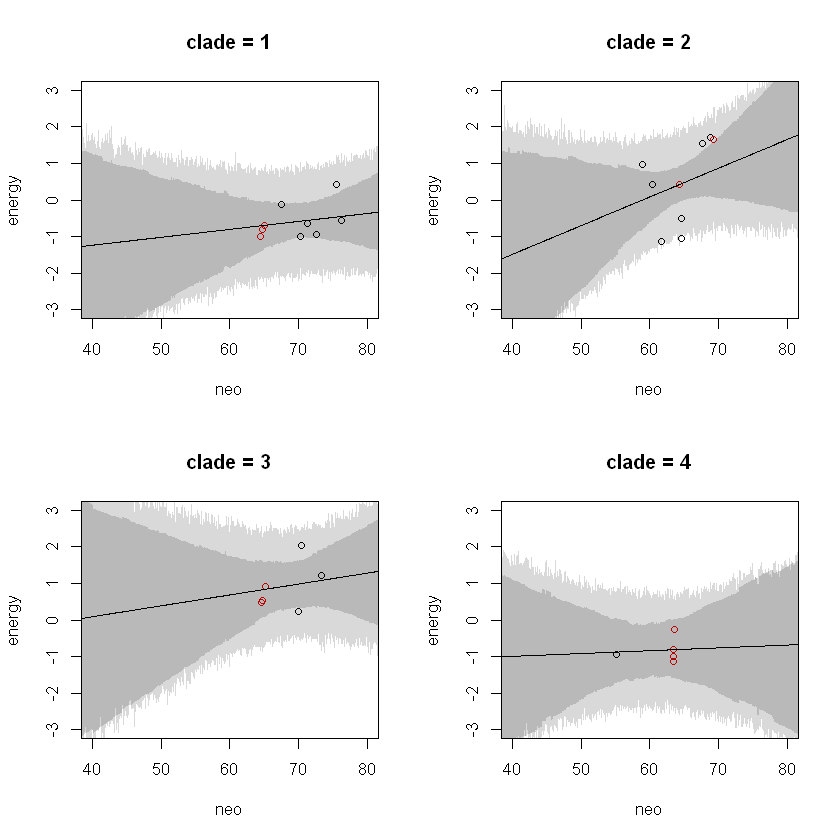

In [27]:
model <- linear_pool
post <- post_linear_pool
seq <- seq(from = 0, to = 100, by = 0.1)

# make a plot window with three panels in a single row 
par(mfrow=c(2,2)) # 1 row, 4 columns

for (clade in 1:4) {
plot(energy ~ neo, data = d[d$clade == clade, ], xlim = c(40, 80), ylim = c(-3, 3))
points(imput$neo[imput$clade == clade], imput$energy[imput$clade == clade], col = "red")
title(paste("clade =", clade))

mu_link <- function(neo) post$a[, clade] + post$b_neo[, clade] * neo

mu <- sapply(seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)
lines(seq, mu_mean)
shade(mu_HPDI, seq)

sim_data <- sim(linear, data = list(neo = seq, clade = clade))
sim_HPDI <- apply(sim_data, 2, HPDI, prob = 0.91)
shade(sim_HPDI, seq)
}

In [28]:
precis(linear_pool, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
neo_impute[1],63.401190157,9.12565014,49.33374850,78.2289775,6368.158950,1.0004881
neo_impute[2],63.073305314,9.26616250,48.50348000,78.3092515,6337.207727,0.9997947
neo_impute[3],63.184175543,9.13032462,48.79603950,77.9183935,6642.045400,1.0000820
neo_impute[4],63.775747143,9.51903710,48.93157800,79.0702980,5213.135095,0.9997851
neo_impute[5],69.392647814,8.74034580,53.89472000,82.4006040,3155.090804,1.0014669
neo_impute[6],64.125642100,7.49011897,52.02289450,75.9987270,6183.279145,1.0002492
neo_impute[7],64.396968014,9.10312555,49.46235150,78.8682265,5805.979340,1.0007316
neo_impute[8],64.244147871,8.87750156,50.04987450,78.3400220,6082.188258,1.0004565
neo_impute[9],65.191679557,9.06783711,50.36982000,79.3008365,5516.926787,1.0004263
